# Life Expectancy Dataset 

___Dataset___: https://www.kaggle.com/kumarajarshi/life-expectancy-who

 ___Columns___:

    - Country 
    - Year
    - Status: Developed or Developing status
    - Life expectancy: Life Expectancy in age 
    - Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population) 
    - infant deaths: Number of Infant Deaths per 1000 population
    - Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
    - percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
    - Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
    - Measles: Measles number of reported cases per 1000 population
    - BMI: Average Body Mass Index of entire population
    - under-five deaths: Number of under-five deaths per 1000 population
    - Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
    - Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
    - Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
    - HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
    - GDP: Gross Domestic Product per capita (in USD)
    - Population: Population of the country
    - thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
    - thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
    - Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
    - Schooling: Number of years of Schooling(years)
   
   

# Load Data

In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [149]:
Data_path='../data/external/Life Expectancy Data.csv'
df = pd.read_csv(Data_path)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [151]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [152]:
df.isnull().sum().sort_values(ascending=False)

population                         652
hepatitis_b                        553
gdp                                448
total_expenditure                  226
alcohol                            194
income_composition_of_resources    167
schooling                          163
thinness_5-9_years                  34
thinness__1-19_years                34
bmi                                 34
polio                               19
diphtheria                          19
life_expectancy                     10
adult_mortality                     10
hiv/aids                             0
country                              0
year                                 0
measles                              0
percentage_expenditure               0
infant_deaths                        0
status                               0
under-five_deaths                    0
dtype: int64

In [153]:
round(df.isnull().mean()*100,2).sort_values(ascending=False)

population                         22.19
hepatitis_b                        18.82
gdp                                15.25
total_expenditure                   7.69
alcohol                             6.60
income_composition_of_resources     5.68
schooling                           5.55
thinness_5-9_years                  1.16
thinness__1-19_years                1.16
bmi                                 1.16
polio                               0.65
diphtheria                          0.65
life_expectancy                     0.34
adult_mortality                     0.34
hiv/aids                            0.00
country                             0.00
year                                0.00
measles                             0.00
percentage_expenditure              0.00
infant_deaths                       0.00
status                              0.00
under-five_deaths                   0.00
dtype: float64

In [154]:
df.population

0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: population, Length: 2938, dtype: float64

In [155]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [156]:
df[df['country']=='Afghanistan'][['country', 'population', 'year']]

,country,population,year
0,Afghanistan,33736494.0,2015
1,Afghanistan,327582.0,2014
2,Afghanistan,31731688.0,2013
3,Afghanistan,3696958.0,2012
4,Afghanistan,2978599.0,2011
5,Afghanistan,2883167.0,2010
6,Afghanistan,284331.0,2009
7,Afghanistan,2729431.0,2008
8,Afghanistan,26616792.0,2007
9,Afghanistan,2589345.0,2006


In [157]:
df[df['country']=='Uruguay'][['country', 'population', 'year']]

,country,population,year
2810,Uruguay,3431552.0,2015
2811,Uruguay,3419546.0,2014
2812,Uruguay,3485.0,2013
2813,Uruguay,3396777.0,2012
2814,Uruguay,3385624.0,2011
2815,Uruguay,3374415.0,2010
2816,Uruguay,3362755.0,2009
2817,Uruguay,335824.0,2008
2818,Uruguay,3339741.0,2007
2819,Uruguay,333143.0,2006


In [158]:
df[df['country']=='India'][['country', 'population', 'year']]

,country,population,year
1186,India,1.395398e+06,2015
1187,India,1.293859e+09,2014
1188,India,1.278562e+08,2013
1189,India,1.263659e+08,2012
1190,India,1.247236e+08,2011
1191,India,1.239869e+07,2010
1192,India,1.214271e+08,2009
1193,India,1.197147e+08,2008
1194,India,1.179681e+09,2007
1195,India,1.161978e+09,2006


> Population values are not accurate

In [159]:
df.drop('population', axis=1, inplace=True)

<AxesSubplot:>

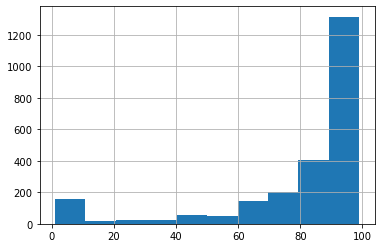

In [160]:
df.hepatitis_b.hist()

In [161]:
df.hepatitis_b.describe()

count    2385.000000
mean       80.940461
std        25.070016
min         1.000000
25%        77.000000
50%        92.000000
75%        97.000000
max        99.000000
Name: hepatitis_b, dtype: float64

In [162]:
df[df['country']=='India'][['country', 'hepatitis_b', 'year']]

,country,hepatitis_b,year
1186,India,87.0,2015
1187,India,79.0,2014
1188,India,7.0,2013
1189,India,73.0,2012
1190,India,44.0,2011
1191,India,38.0,2010
1192,India,37.0,2009
1193,India,29.0,2008
1194,India,6.0,2007
1195,India,6.0,2006


In [163]:
df[df['country']=='Egypt'][['country', 'hepatitis_b', 'year']]

,country,hepatitis_b,year
802,Egypt,93.0,2015
803,Egypt,94.0,2014
804,Egypt,97.0,2013
805,Egypt,93.0,2012
806,Egypt,96.0,2011
807,Egypt,97.0,2010
808,Egypt,97.0,2009
809,Egypt,97.0,2008
810,Egypt,98.0,2007
811,Egypt,98.0,2006


In [164]:
df[df['country']=='Uruguay'][['country', 'hepatitis_b', 'year']]

,country,hepatitis_b,year
2810,Uruguay,95.0,2015
2811,Uruguay,95.0,2014
2812,Uruguay,94.0,2013
2813,Uruguay,95.0,2012
2814,Uruguay,95.0,2011
2815,Uruguay,95.0,2010
2816,Uruguay,95.0,2009
2817,Uruguay,94.0,2008
2818,Uruguay,94.0,2007
2819,Uruguay,95.0,2006


In [165]:
hepatitis_b_country_median = pd.DataFrame(df.groupby('country')['hepatitis_b'].median().reset_index())
hepatitis_b_country_median

,country,hepatitis_b
0,Afghanistan,64.0
1,Albania,98.0
2,Algeria,94.5
3,Angola,72.0
4,Antigua and Barbuda,99.0
...,...,...
188,Venezuela (Bolivarian Republic of),78.0
189,Viet Nam,94.0
190,Yemen,69.0
191,Zambia,81.0


In [166]:
hepatitis_b_status_median = pd.DataFrame(df.groupby('status')['hepatitis_b'].median().reset_index())
hepatitis_b_status_median

,status,hepatitis_b
0,Developed,95.0
1,Developing,91.0


In [167]:
def impute_hepatitis_b(cols):
    hepatitis_b = cols[0]
    country = cols[1]
    status = cols[2]
    if pd.isnull(hepatitis_b):
        if str(hepatitis_b_country_median[hepatitis_b_country_median['country']==country]['hepatitis_b'].values[0]) != 'nan':
            return hepatitis_b_country_median[hepatitis_b_country_median['country']==country]['hepatitis_b'].values[0]
        else:
            return hepatitis_b_status_median[hepatitis_b_status_median['status']==status]['hepatitis_b'].values[0]
    else:
        return hepatitis_b

In [168]:
df.hepatitis_b =df.apply(lambda x: impute_hepatitis_b(x[['hepatitis_b', 'country', 'status']]), axis=1)

In [169]:
df.hepatitis_b.isnull().sum()

0

In [170]:
df[df.gdp.isna()]['country'].unique()

array(['Bahamas', 'Bolivia (Plurinational State of)', "Côte d'Ivoire",
       'Congo', 'Cook Islands', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'Monaco', 'Niue',
       'Papua New Guinea', 'Republic of Korea', 'Republic of Moldova',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Slovakia', 'Somalia', 'South Sudan',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

In [171]:
df[df.country =='Syrian Arab Republic']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2537,Syrian Arab Republic,2015,Developing,64.5,293.0,6,NaN,0.000000,41.0,45,...,8,5.0,NaN,41.0,0.1,NaN,6.3,6.1,0.553,9.0
2538,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,8,52.0,3.25,43.0,0.1,NaN,6.3,6.1,0.575,9.0
2539,Syrian Arab Republic,2013,Developing,63.6,37.0,7,0.01,0.000000,71.0,740,...,9,5.0,3.25,41.0,0.1,NaN,6.3,6.1,0.635,13.0
2540,Syrian Arab Republic,2012,Developing,62.8,32.0,7,0.01,0.000000,43.0,13,...,9,47.0,3.25,45.0,0.1,NaN,6.3,6.1,0.645,12.5
2541,Syrian Arab Republic,2011,Developing,71.7,163.0,7,0.76,0.000000,66.0,13,...,8,6.0,3.23,72.0,0.1,NaN,6.3,6.1,0.646,12.0
2542,Syrian Arab Republic,2010,Developing,73.7,127.0,7,0.78,0.000000,84.0,26,...,9,83.0,3.28,8.0,0.1,NaN,6.4,6.1,0.650,11.7
2543,Syrian Arab Republic,2009,Developing,73.8,124.0,7,0.81,0.000000,84.0,22,...,9,83.0,3.55,8.0,0.1,NaN,6.4,6.2,0.648,11.8
2544,Syrian Arab Republic,2008,Developing,73.8,122.0,8,0.80,0.000000,83.0,19,...,9,83.0,3.40,79.0,0.1,NaN,6.4,6.2,0.651,11.6
2545,Syrian Arab Republic,2007,Developing,73.8,121.0,8,0.83,17.981362,83.0,403,...,9,83.0,3.72,8.0,0.1,258.352900,6.4,6.2,0.644,11.5
2546,Syrian Arab Republic,2006,Developing,73.7,123.0,8,0.97,122.652333,83.0,517,...,10,83.0,3.78,8.0,0.1,1762.246170,6.4,6.3,0.636,11.4


In [172]:
gdp_country_median = pd.DataFrame(df.groupby('country')['gdp'].median().reset_index())
gdp_country_median

,country,gdp
0,Afghanistan,321.199783
1,Albania,1390.308084
2,Algeria,3031.800100
3,Angola,1111.730143
4,Antigua and Barbuda,11650.644430
...,...,...
188,Venezuela (Bolivarian Republic of),NaN
189,Viet Nam,NaN
190,Yemen,NaN
191,Zambia,560.238080


In [173]:
gdp_status_median = pd.DataFrame(df.groupby('status')['gdp'].median().reset_index())
gdp_status_median

,status,gdp
0,Developed,13560.723860
1,Developing,1246.021671


In [174]:
def impute_gdp(cols):
    gdp = cols[0]
    country = cols[1]
    status = cols[2]
    if pd.isnull(gdp):
        if str(gdp_country_median[gdp_country_median['country']==country]['gdp'].values[0]) != 'nan':
            return gdp_country_median[gdp_country_median['country']==country]['gdp'].values[0]
        else:
            return gdp_status_median[gdp_status_median['status']==status]['gdp'].values[0]
    else:
        return gdp

In [175]:
df.gdp = df.apply(lambda x: impute_gdp(x[['gdp', 'country', 'status']]), axis=1)

In [176]:
df.gdp.isnull().sum()

0

In [177]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [178]:
total_expenditure_country_median = pd.DataFrame(df.groupby('country')['total_expenditure'].median().reset_index())
total_expenditure_country_median


,country,total_expenditure
0,Afghanistan,8.19
1,Albania,5.94
2,Algeria,3.84
3,Angola,3.84
4,Antigua and Barbuda,4.53
...,...,...
188,Venezuela (Bolivarian Republic of),4.93
189,Viet Nam,5.90
190,Yemen,5.00
191,Zambia,4.99


In [179]:
total_expenditure_status_median = pd.DataFrame(df.groupby('status')['total_expenditure'].median().reset_index())
total_expenditure_status_median

,status,total_expenditure
0,Developed,7.895
1,Developing,5.400


In [180]:
def impute_total_expenditure(cols):
    total_expenditure = cols[0]
    country = cols[1]
    status = cols[2]
    if pd.isnull(total_expenditure):
        if str(total_expenditure_country_median[total_expenditure_country_median['country']==country]['total_expenditure'].values[0]) != 'nan':
            return total_expenditure_country_median[total_expenditure_country_median['country']==country]['total_expenditure'].values[0]
        else:
            return total_expenditure_status_median[total_expenditure_status_median['status']==status]['total_expenditure'].values[0]
    else:
        return total_expenditure

In [181]:
df.total_expenditure = df.apply(lambda x: impute_total_expenditure(x[['total_expenditure', 'country', 'status']]), axis=1)

In [182]:
df.total_expenditure.isnull().sum()

0

In [183]:
numerical_features = [col for col in df.columns if df[col].dtype != 'object']

In [184]:
# KNN Imputation

imputer = KNNImputer(n_neighbors=2)
df[numerical_features] = pd.DataFrame(imputer.fit_transform(df[numerical_features]), columns=df[numerical_features].columns)
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
thinness__1-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [185]:
df.corr()['life_expectancy'].sort_values(ascending=False)

life_expectancy                    1.000000
schooling                          0.743984
income_composition_of_resources    0.721887
bmi                                0.564269
diphtheria                         0.477804
polio                              0.463489
gdp                                0.447795
alcohol                            0.397965
percentage_expenditure             0.381336
hepatitis_b                        0.309194
total_expenditure                  0.225934
year                               0.170477
measles                           -0.157682
infant_deaths                     -0.196666
under-five_deaths                 -0.222629
thinness_5-9_years                -0.470866
thinness__1-19_years              -0.476895
hiv/aids                          -0.556516
adult_mortality                   -0.696162
Name: life_expectancy, dtype: float64

In [186]:
category_features = [col for col in df.columns if df[col].dtype == 'object']
category_features

['country', 'status']

In [187]:
numerical_features.remove('life_expectancy')

In [188]:
df.country.value_counts().nsmallest(10)

Monaco                   1
Saint Kitts and Nevis    1
Nauru                    1
Marshall Islands         1
Cook Islands             1
San Marino               1
Tuvalu                   1
Niue                     1
Dominica                 1
Palau                    1
Name: country, dtype: int64

In [189]:
country_one_time = list(df.country.value_counts().nsmallest(10).index)
country_one_time

['Monaco',
 'Saint Kitts and Nevis',
 'Nauru',
 'Marshall Islands',
 'Cook Islands',
 'San Marino',
 'Tuvalu',
 'Niue',
 'Dominica',
 'Palau']

In [190]:
df.drop(df[df.country.isin(country_one_time)].index, inplace=True)

In [194]:
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [193]:
df.year.value_counts()

2014.0    183
2005.0    183
2012.0    183
2002.0    183
2004.0    183
2003.0    183
2001.0    183
2013.0    183
2015.0    183
2000.0    183
2007.0    183
2009.0    183
2008.0    183
2006.0    183
2010.0    183
2011.0    183
Name: year, dtype: int64

In [196]:
df.status.unique()

array(['Developing', 'Developed'], dtype=object)

In [195]:
df[df['status']=='Developing']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [197]:
df[df['status']=='Developed']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
112,Australia,2015.0,Developed,82.8,59.0,1.0,0.91,0.00000,93.0,74.0,...,1.0,93.0,8.78,93.0,0.1,56554.38760,0.6,0.6,0.9370,20.40
113,Australia,2014.0,Developed,82.7,6.0,1.0,9.71,10769.36305,91.0,340.0,...,1.0,92.0,9.42,92.0,0.1,62214.69120,0.6,0.6,0.9360,20.40
114,Australia,2013.0,Developed,82.5,61.0,1.0,9.87,11734.85381,91.0,158.0,...,1.0,91.0,9.36,91.0,0.1,67792.33860,0.6,0.6,0.9330,20.30
115,Australia,2012.0,Developed,82.3,61.0,1.0,10.03,11714.99858,91.0,199.0,...,1.0,92.0,9.36,92.0,0.1,67677.63477,0.6,0.6,0.9300,20.10
116,Australia,2011.0,Developed,82.0,63.0,1.0,10.30,10986.26527,92.0,190.0,...,1.0,92.0,9.20,92.0,0.1,62245.12900,0.6,0.6,0.9270,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004.0,Developed,77.5,111.0,28.0,8.48,0.00000,92.0,37.0,...,33.0,92.0,15.14,96.0,0.1,13560.72386,0.7,0.6,0.8395,15.05
2806,United States of America,2003.0,Developed,77.2,114.0,28.0,8.40,0.00000,92.0,56.0,...,33.0,91.0,15.60,96.0,0.1,13560.72386,0.7,0.6,0.8395,15.05
2807,United States of America,2002.0,Developed,77.0,115.0,28.0,8.33,0.00000,88.0,41.0,...,33.0,9.0,14.55,94.0,0.1,13560.72386,0.8,0.6,0.8395,15.05
2808,United States of America,2001.0,Developed,76.9,115.0,28.0,8.25,0.00000,89.0,116.0,...,33.0,89.0,13.73,94.0,0.1,13560.72386,0.8,0.6,0.7685,13.40


In [288]:
df['year']=df['year'].astype('int')
df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [289]:
backup=df.copy()
df_c=df.copy()
df_c

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [291]:
df_c['status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [290]:
developing_countries_df=df[df['status']=='Developing']
developing_countries_df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [292]:
developed_countries_df=df[df['status']=='Developed']
developed_countries_df

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
112,Australia,2015,Developed,82.8,59.0,1.0,0.91,0.00000,93.0,74.0,...,1.0,93.0,8.78,93.0,0.1,56554.38760,0.6,0.6,0.9370,20.40
113,Australia,2014,Developed,82.7,6.0,1.0,9.71,10769.36305,91.0,340.0,...,1.0,92.0,9.42,92.0,0.1,62214.69120,0.6,0.6,0.9360,20.40
114,Australia,2013,Developed,82.5,61.0,1.0,9.87,11734.85381,91.0,158.0,...,1.0,91.0,9.36,91.0,0.1,67792.33860,0.6,0.6,0.9330,20.30
115,Australia,2012,Developed,82.3,61.0,1.0,10.03,11714.99858,91.0,199.0,...,1.0,92.0,9.36,92.0,0.1,67677.63477,0.6,0.6,0.9300,20.10
116,Australia,2011,Developed,82.0,63.0,1.0,10.30,10986.26527,92.0,190.0,...,1.0,92.0,9.20,92.0,0.1,62245.12900,0.6,0.6,0.9270,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28.0,8.48,0.00000,92.0,37.0,...,33.0,92.0,15.14,96.0,0.1,13560.72386,0.7,0.6,0.8395,15.05
2806,United States of America,2003,Developed,77.2,114.0,28.0,8.40,0.00000,92.0,56.0,...,33.0,91.0,15.60,96.0,0.1,13560.72386,0.7,0.6,0.8395,15.05
2807,United States of America,2002,Developed,77.0,115.0,28.0,8.33,0.00000,88.0,41.0,...,33.0,9.0,14.55,94.0,0.1,13560.72386,0.8,0.6,0.8395,15.05
2808,United States of America,2001,Developed,76.9,115.0,28.0,8.25,0.00000,89.0,116.0,...,33.0,89.0,13.73,94.0,0.1,13560.72386,0.8,0.6,0.7685,13.40


In [293]:
df_c.drop('country',axis=1,inplace=True)
df_c

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [294]:
df_c.sort_values('year',ignore_index=True,inplace=True)
df_c

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2000,Developing,46.0,665.0,24.0,1.680,0.000000,79.0,1483.0,25.5,39.0,78.0,7.10,78.0,43.5,547.358878,11.0,11.2,0.434,9.8
1,2000,Developed,78.1,84.0,1.0,10.060,2944.640134,51.0,1019.0,51.8,1.0,97.0,7.42,97.0,0.1,25921.127940,1.1,1.1,0.873,16.5
2,2000,Developing,66.3,188.0,187.0,0.060,3.433344,65.0,3344.0,15.4,237.0,72.0,1.98,75.0,0.1,78.927440,11.0,11.2,0.597,10.7
3,2000,Developing,72.6,11.0,10.0,0.050,782.179982,93.0,0.0,56.2,12.0,95.0,4.24,95.0,0.1,9126.954277,7.3,7.4,0.737,11.8
4,2000,Developing,58.7,276.0,3.0,0.500,49.069672,76.5,0.0,11.9,4.0,52.5,3.26,48.0,0.1,422.286330,12.2,12.2,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2015,Developing,59.0,284.0,26.0,1.250,0.000000,54.0,243.0,23.3,40.0,42.0,3.76,54.0,0.5,554.487660,7.3,7.3,0.414,8.8
2924,2015,Developing,71.0,175.0,0.0,9.135,0.000000,94.0,0.0,5.9,0.0,94.0,4.76,94.0,0.2,4849.997495,3.5,3.4,0.706,12.8
2925,2015,Developing,62.9,275.0,10.0,4.305,0.000000,67.0,38.0,48.6,12.0,74.0,4.78,73.0,0.6,631.946853,1.3,1.3,0.515,10.0
2926,2015,Developed,81.0,68.0,2.0,0.870,0.000000,88.0,2464.0,62.3,3.0,94.0,1.52,95.0,0.1,41176.881580,1.1,1.1,0.924,17.1


In [316]:

def maping_df_to_standard_status_Dfs(DF):
    '''
    a fuction to return the dat frame to standard dataframes according to the status
    it gets the average value for the feature for each year in the developing countries.
    
    input:
       --> DF: a data frame
    output:
       --> result: a dict every status is a key and its value is its standard data frame
    
    '''
    result={}
    for status in DF['status'].unique():
        df=DF[DF['status']==status]
        new_d={col:[] for col in df.columns}
        for year in df.year.unique():
            for col in df.columns:
                if col=='status':
                    new_d[col].append(status)
                elif col=='year':
                    new_d[col].append(year)
                else:
                    new_d[col].append(sum(df[df['year']==year][col])/len(df[df['year']==year]))
        result[status]=pd.DataFrame(new_d)
    return result

In [317]:
r=maping_df_to_standard_status_Dfs(df_c)
list(r.keys())

['Developing', 'Developed']

In [320]:
developing_standard_df=r[df['status'].unique()[0]]
developing_standard_df

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2000,Developing,64.619868,200.496689,45.119205,3.412583,172.127397,77.089404,5480.331126,31.862914,64.655629,73.519868,5.250960,71.519868,3.045033,2191.702597,5.957947,6.076821,0.455500,9.622185
1,2001,Developing,65.009934,193.158940,44.258278,3.412384,193.352604,75.625828,5420.860927,33.280464,62.622517,74.261589,5.310298,73.423841,3.098013,2215.925958,5.708609,5.827815,0.512185,10.078477
2,2002,Developing,65.190728,189.443709,42.761589,3.506026,208.719722,74.652318,3559.350993,33.735430,60.523179,77.079470,5.352947,76.046358,3.098013,2382.807574,5.962252,5.907285,0.516295,10.303642
3,2003,Developing,65.206623,187.609272,41.913907,3.518675,274.811662,71.731788,4346.172185,33.531457,58.456954,77.314570,5.522517,75.976821,3.065563,2799.371752,5.680132,5.799338,0.520513,10.481457
4,2004,Developing,65.370861,207.834437,40.423841,3.581656,308.140430,74.211921,3329.801325,33.580795,56.662252,77.509934,5.489470,76.506623,2.982781,3317.879346,5.699669,5.812252,0.535298,10.736755
5,2005,Developing,66.009272,184.172185,38.887417,3.729967,371.449443,77.443709,3836.218543,32.574834,54.496689,78.625828,5.557219,79.417219,2.821854,3568.530418,5.884106,5.998013,0.540099,10.780132
6,2006,Developing,66.450331,186.695364,38.211921,3.770397,261.189536,77.824503,2447.450331,34.421192,53.251656,82.284768,5.311391,79.463576,2.607947,3008.344134,5.954305,6.007616,0.587096,11.158609
7,2007,Developing,66.860927,177.589404,36.768212,3.870265,347.608217,77.976821,1862.152318,33.705960,51.397351,82.708609,5.243642,82.072848,2.394040,3754.583021,5.845695,5.775828,0.591563,11.252649
8,2008,Developing,67.413907,195.172185,35.516556,3.913344,420.268478,81.079470,1724.410596,34.342053,49.701987,83.635762,5.400000,82.718543,2.156954,4808.674760,5.712583,5.756291,0.600275,11.381457
9,2009,Developing,67.894040,181.754967,34.788079,3.802086,319.873865,81.576159,1799.437086,36.282450,47.821192,83.278146,6.101987,82.920530,1.843709,3793.581784,5.590066,5.507616,0.605828,11.512583


In [321]:
developed_standard_df=r[df['status'].unique()[1]]
developed_standard_df

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2000,Developed,76.803125,91.71875,1.78125,9.930625,1897.607997,80.12500,810.75000,45.581250,2.15625,89.06250,7.021562,83.68750,0.1,15008.937729,1.462500,1.440625,0.815828,14.954688
1,2001,Developed,77.128125,90.28125,1.75000,9.861250,2042.071819,81.68750,956.81250,48.950000,2.09375,93.87500,6.820625,92.00000,0.1,15727.355581,1.434375,1.412500,0.820203,15.064062
2,2002,Developed,77.546875,86.46875,1.71875,10.018125,1741.772286,87.53125,1531.50000,52.315625,2.06250,91.93750,7.113750,92.25000,0.1,13703.638823,1.418750,1.393750,0.827656,15.282813
3,2003,Developed,77.940625,81.93750,1.65625,10.126563,1532.335532,87.93750,701.15625,49.487500,2.00000,94.96875,7.143125,92.81250,0.1,12588.212802,1.381250,1.368750,0.830359,15.343750
4,2004,Developed,78.384375,84.46875,1.65625,10.188750,2962.759738,90.87500,331.43750,50.031250,1.93750,92.31250,7.477187,95.12500,0.1,21303.601335,1.362500,1.343750,0.836609,15.571875
5,2005,Developed,78.590625,89.59375,1.59375,10.108125,2955.573378,89.09375,201.00000,49.731250,1.93750,92.37500,7.504063,92.53125,0.1,21066.093600,1.337500,1.331250,0.841797,15.548437
6,2006,Developed,79.131250,93.53125,1.59375,10.230937,3507.076451,92.09375,250.15625,51.940625,1.90625,94.90625,7.416875,95.12500,0.1,24183.544859,1.321875,1.309375,0.844969,15.646875
7,2007,Developed,79.300000,75.90625,1.56250,10.307812,3818.033094,91.65625,120.15625,52.465625,1.84375,94.46875,7.354375,94.65625,0.1,26464.503719,1.303125,1.290625,0.850328,15.670313
8,2008,Developed,78.931250,77.06250,1.50000,10.263125,4283.479633,89.78125,573.90625,55.518750,1.78125,94.53125,7.134062,94.78125,0.1,31568.861146,1.287500,1.271875,0.855203,15.779688
9,2009,Developed,79.584375,76.75000,1.43750,9.906875,2607.108282,92.25000,216.31250,54.353125,1.78125,94.62500,8.351562,94.81250,0.1,19084.632583,1.278125,1.262500,0.857984,15.834375


In [322]:
developed_countries_df.to_csv('../data/processed/developed_countries_df.csv',index=False)
developing_countries_df.to_csv('../data/processed/developing_countries_df.csv',index=False)
developed_standard_df.to_csv('../data/processed/developed_standard_df.csv',index=False)
developing_standard_df.to_csv('../data/processed/developing_standard_df.csv',index=False)


In [325]:
df_c=df
df_c

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [338]:
le_df=pd.pivot_table(df_c,index='country',columns='year',values='life_expectancy')
le_df

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,
Afghanistan,54.8,55.3,56.2,56.7,57.0,57.3,57.3,57.5,58.1,58.6,58.8,59.2,59.5,59.9,59.9,65.0
Albania,72.6,73.6,73.3,72.8,73.0,73.5,74.2,75.9,75.3,76.1,76.2,76.6,76.9,77.2,77.5,77.8
Algeria,71.3,71.4,71.6,71.7,72.3,72.9,73.4,73.8,74.1,74.4,74.7,74.9,75.1,75.3,75.4,75.6
Angola,45.3,45.7,46.5,46.8,47.1,47.4,47.7,48.2,48.7,49.1,49.6,51.0,56.0,51.1,51.7,52.4
Antigua and Barbuda,73.6,73.8,74.0,74.2,74.4,74.6,74.8,75.0,75.2,75.4,75.6,75.7,75.9,76.1,76.2,76.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),72.5,72.5,73.1,72.4,73.3,73.6,73.6,73.4,73.2,73.6,73.7,73.8,73.7,73.8,73.9,74.1
Viet Nam,73.4,73.6,73.8,74.0,74.2,74.4,74.6,74.7,74.9,75.0,75.2,75.4,75.6,75.7,75.9,76.0
Yemen,68.0,61.1,61.5,61.9,62.2,62.6,63.0,63.4,63.8,64.1,64.4,64.6,64.7,65.4,65.4,65.7


<AxesSubplot:xlabel='year', ylabel='country'>

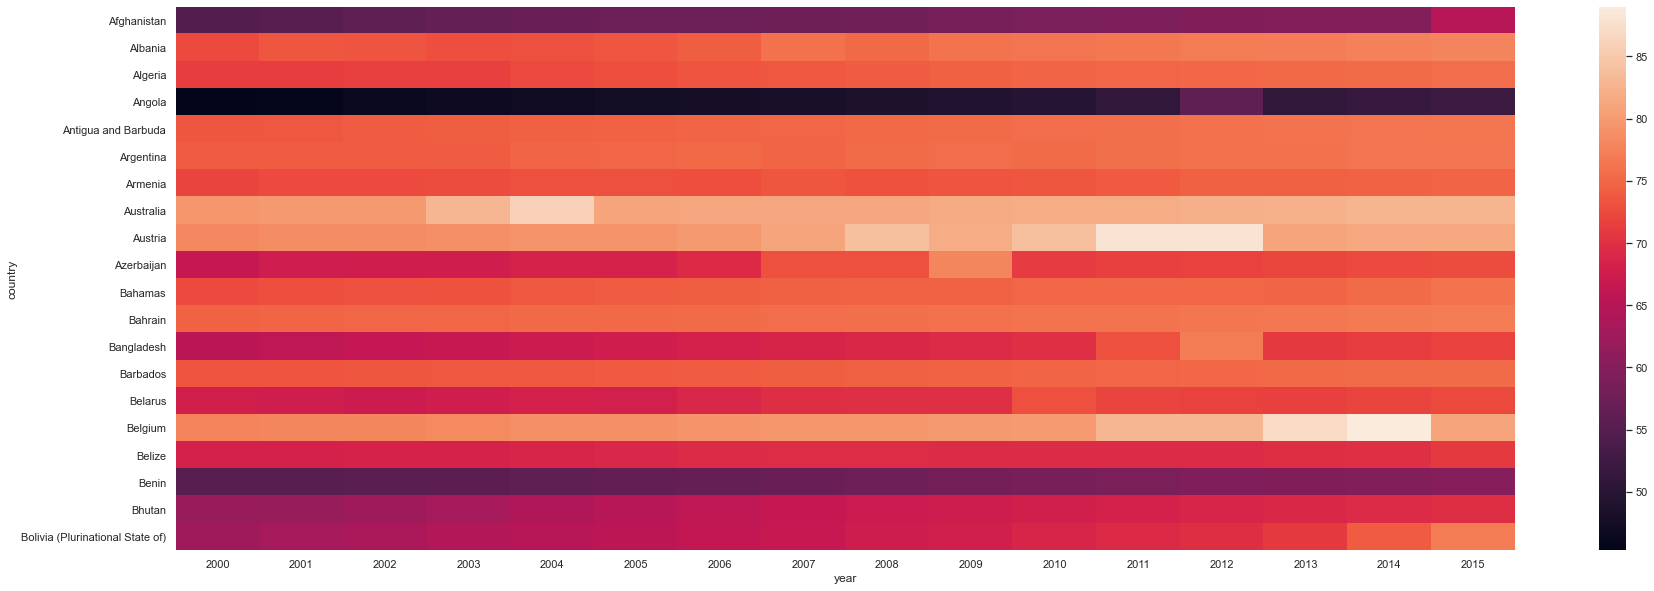

In [339]:
sns.set(rc={'figure.figsize':(30,10)})
sns.heatmap(le_df.iloc[:20])

C:\Users\mgama\conda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

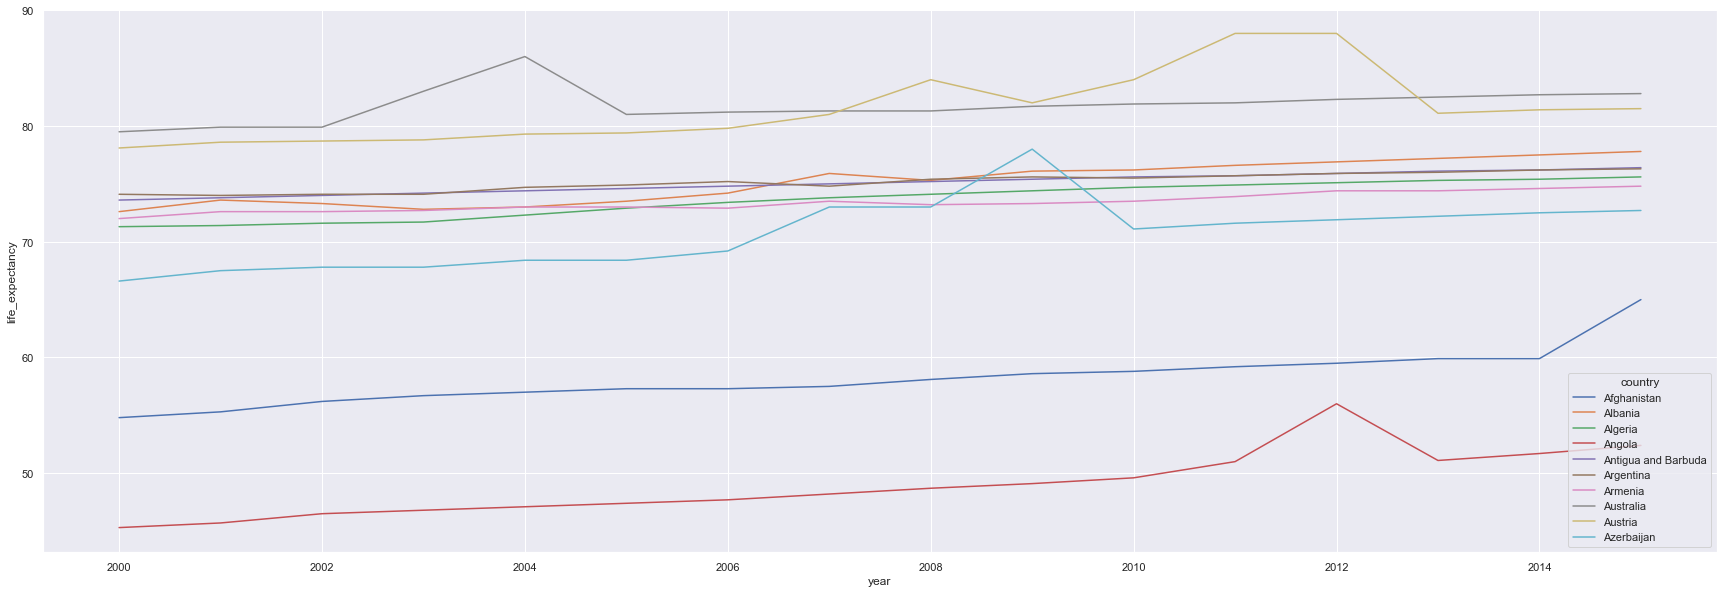

In [344]:
dq=df_c[df_c.country.isin(df_c.country.unique()[:10])]

sns.lineplot('year','life_expectancy',data=dq,hue='country')

C:\Users\mgama\conda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

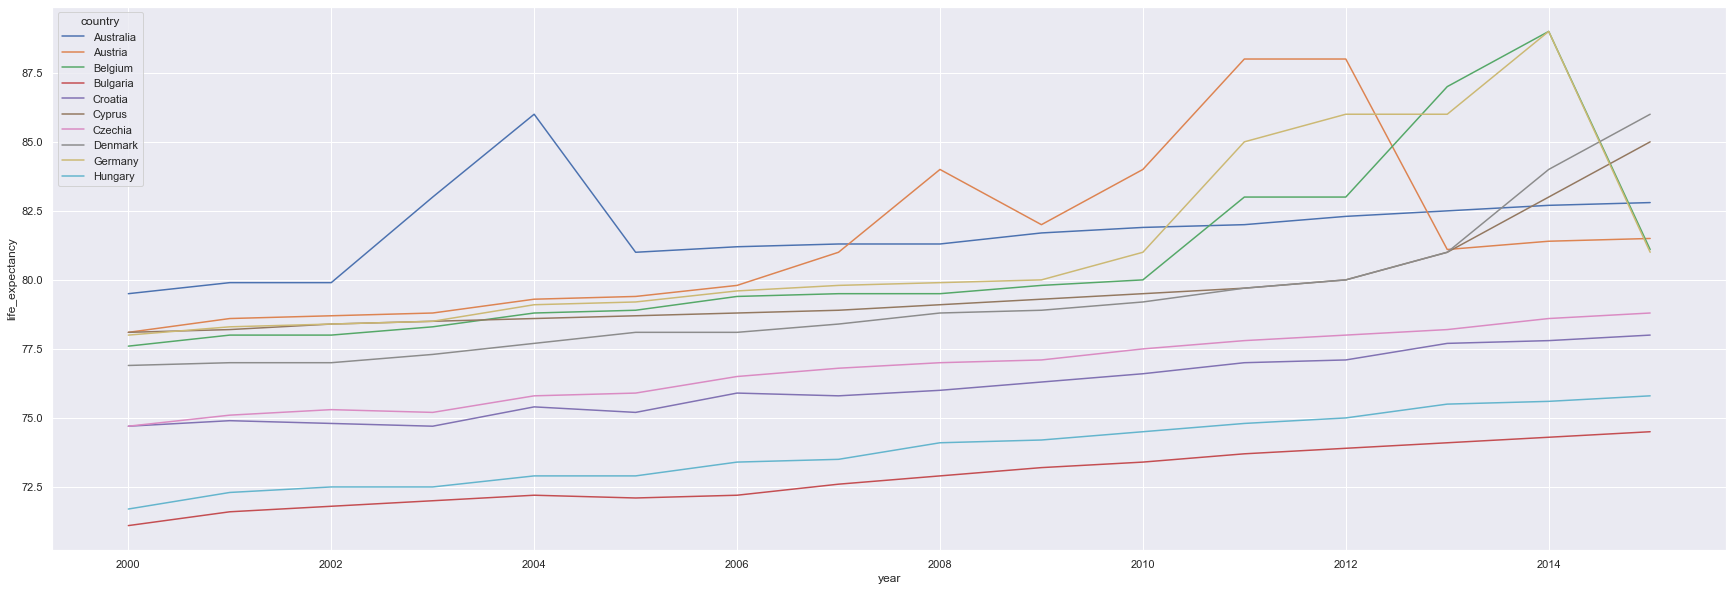

In [349]:
dq=developed_countries_df[developed_countries_df.country.isin(developed_countries_df.country.unique()[:10])]

sns.lineplot('year','life_expectancy',data=dq,hue='country')

C:\Users\mgama\conda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='life_expectancy'>

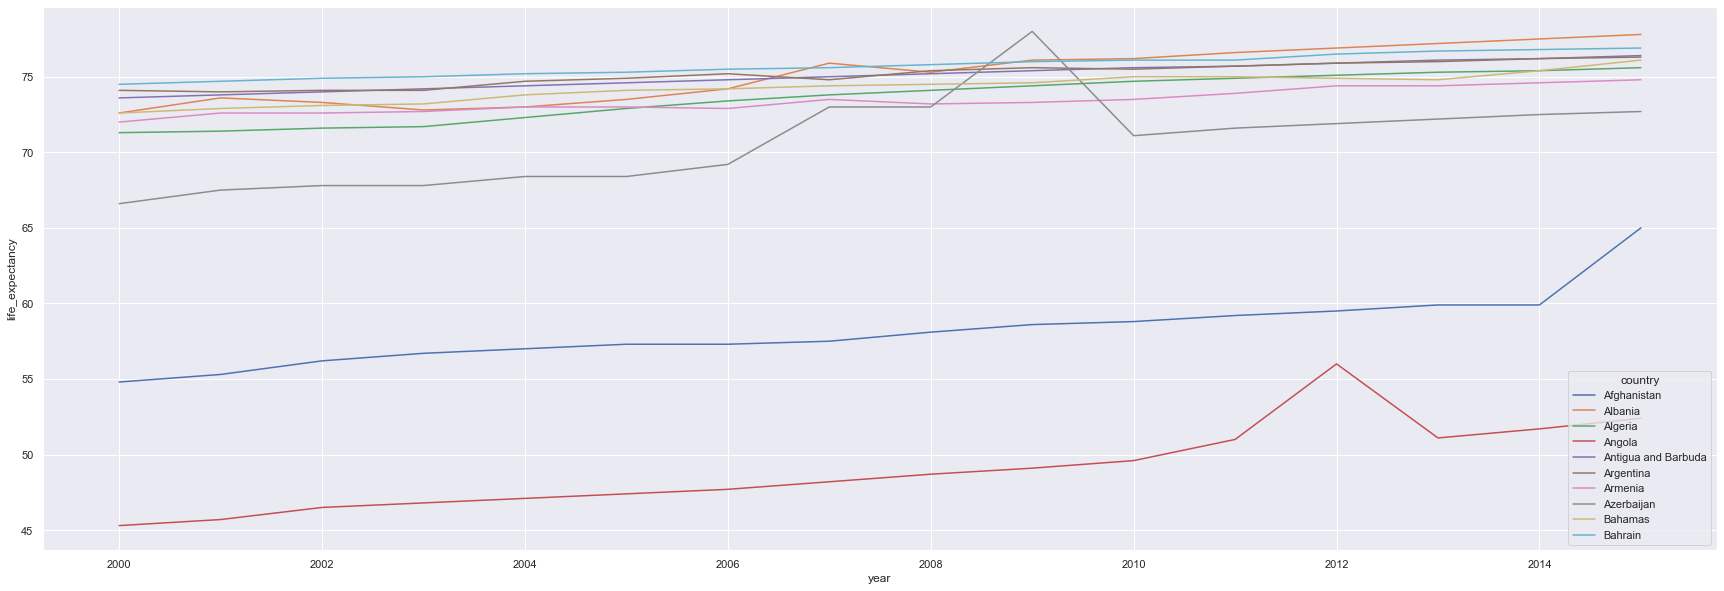

In [350]:
dq=developing_countries_df[developing_countries_df.country.isin(developing_countries_df.country.unique()[:10])]

sns.lineplot('year','life_expectancy',data=dq,hue='country')

In [348]:
df[df['status']=='Developed'].country.unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Germany', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America'], dtype=object)

In [345]:
dd=pd.read_csv('../data/processed/cleaned_df.csv')
dd

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,89.0,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,93.0,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,97.0,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,42.0,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,41.0,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,40.0,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,39.0,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8


In [351]:
standard_df=pd.concat([developed_standard_df,developing_standard_df])
standard_df

,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2000,Developed,76.803125,91.718750,1.781250,9.930625,1897.607997,80.125000,810.750000,45.581250,2.156250,89.062500,7.021562,83.687500,0.100000,15008.937729,1.462500,1.440625,0.815828,14.954688
1,2001,Developed,77.128125,90.281250,1.750000,9.861250,2042.071819,81.687500,956.812500,48.950000,2.093750,93.875000,6.820625,92.000000,0.100000,15727.355581,1.434375,1.412500,0.820203,15.064062
2,2002,Developed,77.546875,86.468750,1.718750,10.018125,1741.772286,87.531250,1531.500000,52.315625,2.062500,91.937500,7.113750,92.250000,0.100000,13703.638823,1.418750,1.393750,0.827656,15.282813
3,2003,Developed,77.940625,81.937500,1.656250,10.126563,1532.335532,87.937500,701.156250,49.487500,2.000000,94.968750,7.143125,92.812500,0.100000,12588.212802,1.381250,1.368750,0.830359,15.343750
4,2004,Developed,78.384375,84.468750,1.656250,10.188750,2962.759738,90.875000,331.437500,50.031250,1.937500,92.312500,7.477187,95.125000,0.100000,21303.601335,1.362500,1.343750,0.836609,15.571875
5,2005,Developed,78.590625,89.593750,1.593750,10.108125,2955.573378,89.093750,201.000000,49.731250,1.937500,92.375000,7.504063,92.531250,0.100000,21066.093600,1.337500,1.331250,0.841797,15.548437
6,2006,Developed,79.131250,93.531250,1.593750,10.230937,3507.076451,92.093750,250.156250,51.940625,1.906250,94.906250,7.416875,95.125000,0.100000,24183.544859,1.321875,1.309375,0.844969,15.646875
7,2007,Developed,79.300000,75.906250,1.562500,10.307812,3818.033094,91.656250,120.156250,52.465625,1.843750,94.468750,7.354375,94.656250,0.100000,26464.503719,1.303125,1.290625,0.850328,15.670313
8,2008,Developed,78.931250,77.062500,1.500000,10.263125,4283.479633,89.781250,573.906250,55.518750,1.781250,94.531250,7.134062,94.781250,0.100000,31568.861146,1.287500,1.271875,0.855203,15.779688
9,2009,Developed,79.584375,76.750000,1.437500,9.906875,2607.108282,92.250000,216.312500,54.353125,1.781250,94.625000,8.351562,94.812500,0.100000,19084.632583,1.278125,1.262500,0.857984,15.834375


In [352]:
standard_df.to_csv('../data/processed/standard_df.csv',index=False)

In [353]:
df.to_csv('../data/processed/cleaned_df.csv',index=False)